In [1]:
from tensorflow.keras.models import Sequential 

In [2]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

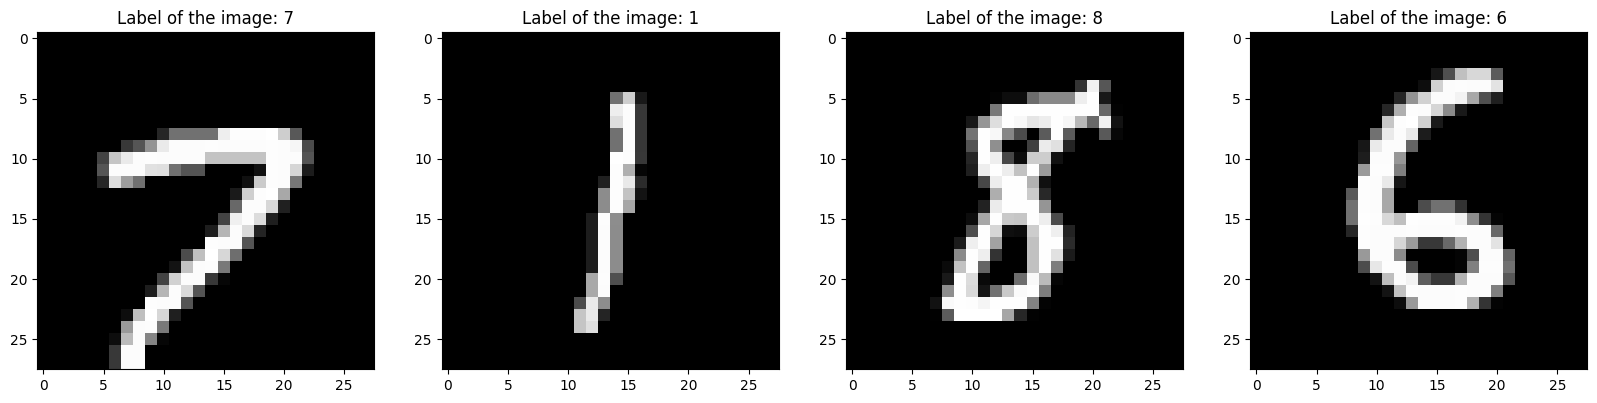

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 8 as the mini-batch size.
* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use 128 as the mini-batch size.
* Implement a three-layer ANN model with 128, 64, and 10 neurons in the layers. Use the full sample as the batch size.
* Compare the results of each model. Which batch size performed best?

In [11]:
# define model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
def build_model(activation_function):
  model = Sequential()
  # The first dense layer
  model.add(Dense(128, input_shape=(784,), activation=activation_function))
  # The second dense layer
  model.add(Dense(64, activation=activation_function))
  # The last layer is the output layer
  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model
def train_me(model,loss_function,batch_size):
  model.compile(optimizer='sgd', loss=loss_function,
              metrics=['accuracy'])
  # Setting `verbose=1` prints out some results after each epoch
  print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())
  model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)
def print_scores(model):
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])

In [10]:
for batch_size in (8,128,60000):
 model = build_model(activation_function='tanh')
 train_me(model,losses.categorical_crossentropy,batch_size)
 print_scores(model)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 377us/step - accuracy: 0.8370 - loss: 0.5915
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 372us/step - accuracy: 0.9354 - loss: 0.2259
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 378us/step - accuracy: 0.9516 - loss: 0.1682
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 365us/step - accuracy: 0.9620 - loss: 0.1339
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 384us/step - accuracy: 0.9686 - loss: 0.1109
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 368us/step - accuracy: 0.9734 - loss: 0.0930
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 384us/step - accuracy: 0.9765 - loss: 0.0809
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 370us/step - accuracy: 0.9804 - loss: 0.0710
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 373us/step - accuracy: 0.9825 - loss: 0.0628
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 373us/step - accuracy: 0.9831 - loss: 0.0599
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 3s 379us/step - accuracy: 0.9862 - loss: 0.0482
Epoch 12

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.5942 - loss: 1.4660
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8589 - loss: 0.5753
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8843 - loss: 0.4417
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8971 - loss: 0.3815
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9065 - loss: 0.3437
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9100 - loss: 0.3253
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9125 - loss: 0.3105
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9169 - loss: 0.2975
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9181 - loss: 0.2898
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9199 - loss: 0.2819
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9235 - loss: 0.2679
Epoch 12/20
469/469 ━━━━━━━━━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.0637 - loss: 2.3895
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.0683 - loss: 2.3658
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.0742 - loss: 2.3432
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.0811 - loss: 2.3217
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0883 - loss: 2.3010
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.0971 - loss: 2.2811
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1071 - loss: 2.2618
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.1176 - loss: 2.2431
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1294 - loss: 2.2250
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1410 - loss: 2.2073
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.1534 - loss: 2.1900
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.1665 - lo

## Minibatch 8 is taking more time to train also having better model performance. size 128 converging fast and running less time also having better model performance. the last option training with complete data as mini batch, running very fast but model performance is not good.

In [13]:
def train_me_opt(model,loss_function,batch_size,optimizer):
  model.compile(optimizer=optimizer, loss=loss_function,
              metrics=['accuracy'])
  # Setting `verbose=1` prints out some results after each epoch
  print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())
  model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

In [16]:
from tensorflow.keras import optimizers 
for learning  in (0.01,100.0,0.0000001):
 model = build_model(activation_function='tanh')
 optimizer = optimizers.Adam(learning_rate=learning)
 train_me_opt(model,losses.categorical_crossentropy,128,optimizer)
 print_scores(model)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 0.01
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8653 - loss: 0.4373
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9562 - loss: 0.1441
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9614 - loss: 0.1268
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9642 - loss: 0.1152
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9665 - loss: 0.1051
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9665 - loss: 0.1095
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9676 - loss: 0.1090
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9636 - loss: 0.1169
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9637 - loss: 0.1170
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9623 - loss: 0.1183
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9651 - loss: 0.1158
Epoch 12/20
469

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 100.0
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4402 - loss: 804.2529
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4546 - loss: 564.0798
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4638 - loss: 582.4048
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4412 - loss: 635.6262
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4422 - loss: 630.4451
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4399 - loss: 636.8990
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4485 - loss: 570.4154
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4438 - loss: 606.4690
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4418 - loss: 644.2677
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4433 - loss: 589.3694
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4412 - loss: 6

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Learning rate before first fit: 1e-07
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1140 - loss: 2.4025
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1157 - loss: 2.3904
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1169 - loss: 2.3848
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1215 - loss: 2.3696
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1239 - loss: 2.3605
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1262 - loss: 2.3513
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1288 - loss: 2.3435
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1331 - loss: 2.3323
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1368 - loss: 2.3209
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1415 - loss: 2.3109
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1450 - loss: 2.3023
Epoch 12/20
46

#### Overall learning rates greatly impact the converging of the model, the learning rate .01 is optimal as the model performance is improving in each iteration better. With learning rate 100 , the model is never converging instead it is diverging. And the last learning rate 0.0000001 is very slowly improving or converging.